## ___
[Home- go back to hadardestani.com](http://hadiardestani.com/)
___
# Data Cleaning and Preparation

A few years ago I borrowed some money from Lending club while I was in school and needed some money. I was very happy with the process and how fast everything worked out. And of course, I paid it off to the last penny. But this is not always the case. Some people default on their loans. How does lending club trust you to borrow money? Of course, they use their past Data, consumer Data, and statistics to determine what is the probability of a potential borrower to pay back in full, and based on their formula they approve or reject the request. I will try to download publically available data from their website and try to create a model that will help predict whether if a potential borrower will pay back in full or not. 

I will be using their data from 2014 and 2015 (I downloaded the data set for each year and the combined the 2 csv files into one. The final file includes over half million records and try to classify and predict whether or not the borrower paid back their loan in full. I downloaded the data from [here](https://www.lendingclub.com/info/download-data.action) (of course I had a username and password since I once was a browser so I just had to reset my password.) At the end of this practice I will download the end result dataset so I can use it for modeling an algorithm in another post.

# Libraries

***Let's first import the usual libraries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

## The Data

***I am going to use pandas to import my CSV file***

In [2]:
lending_club = pd.read_csv('../Data cleaning, Preparation and Feature Engineering/loans.csv',skiprows=1,low_memory=False)

**Side note: the files is more than 100mb, so I used git lfs in order to upload it into my guithub.

In [3]:
#I am going to work off of a copy of the data frame, so my machine doesn't have to re-read the entire data frame every time.
#this will save me some memory.
df = lending_club.copy(deep=True)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,36805548,NaN,10400,10400,10400.0,36 months,6.99%,321.08,A,A3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,38098114,NaN,15000,15000,15000.0,60 months,12.39%,336.64,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,37822187,NaN,9600,9600,9600.0,36 months,13.66%,326.53,C,C3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,37612354,NaN,12800,12800,12800.0,60 months,17.14%,319.08,D,D4,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,37842129,NaN,21425,21425,21425.0,60 months,15.59%,516.36,D,D1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


***let's check the data***

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656724 entries, 0 to 656723
Columns: 150 entries, id to settlement_term
dtypes: float64(69), int64(44), object(37)
memory usage: 751.6+ MB


In [5]:
df.shape

(656724, 150)

**There are 150 columns. we need to look into this and see if there are columns that we can eliminate to make the job easier and faster. To achieve this, we will do a series of dataset evaluation tasks. I also downloaded the data dictionary that is available for download as well. In order to get a better grasp of what these columns are we will need to look at it.**

In [6]:
dic_des = pd.read_excel('../Data cleaning, Preparation and Feature Engineering/LCDataDictionary.xlsx').dropna()

**Now I am going to add a description column from my imported data dictionary by creating a data frame that only shows names and the description. Imaging doing a copy and transpose paste of all the columns in the dataset and then doing a VLOOKUP of name to bring in the description next to it.**

In [7]:
dic_des = dic_des.rename(columns={'LoanStatNew': 'Name'})
df_dtypes = pd.DataFrame(df.dtypes,columns=['dtypes'])
df_dtypes = df_dtypes.reset_index()
df_dtypes['Name'] = df_dtypes['index']
df_dtypes = df_dtypes[['Name','dtypes']]
vlookup = df_dtypes.merge(dic_des, on='Name',how='left')

In [56]:
vlookup.head(20).style.set_properties(subset=['Description'], **{'width': '1000px'})
#Just using head() to make it visually easier for you to follow here. Otherwise I wouldn't, so I can see and go through 
#the whole results

,Name,dtypes,Description
0,id,int64,A unique LC assigned ID for the loan listing.
1,member_id,float64,A unique LC assigned Id for the borrower member.
2,loan_amnt,int64,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,int64,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,The total amount committed by investors for that loan at that point in time.
5,term,object,The number of payments on the loan. Values are in months and can be either 36 or 60.
6,int_rate,object,Interest Rate on the loan
7,installment,float64,The monthly payment owed by the borrower if the loan originates.
8,grade,object,LC assigned loan grade
9,sub_grade,object,LC assigned loan subgrade


**Let's start by looking at the columns and their description to see if there are columns that won't contribute to our purpose so we acn remove them. This is time consuming but worth it. After going through them I decided below colomuns can be removed. They were chosen because either they had nothing to do with a brrower paying back the ooan such as Id or member id, or anything that is about feature meaning after the loan is approved, or anything that is bad formatted and is redundant.
**id / member_id / funded_amnt / funded_amnt_inv / sub_grade / int_rate./ emp_title / issued_d / zip_code / out_prncp  / out_prncp_inv./ total_pymnt / total_pymnt_inv/ total_rec_prncp / total_rec_int/ total_rec_late_fee / recoveries/ collection_recovery_fee/ last_pymnt_d/ last_pymnt_amnt**

In [9]:
df=df.drop (['id','int_rate','total_pymnt','total_rec_late_fee','member_id','sub_grade','total_pymnt_inv',
             'recoveries','funded_amnt','emp_title','total_rec_prncp','collection_recovery_fee','funded_amnt_inv',
             'issue_d','total_rec_int','last_pymnt_d','zip_code','out_prncp','last_pymnt_amnt','out_prncp_inv',
             'installment','last_credit_pull_d','last_fico_range_high','last_fico_range_low','sec_app_fico_range_low','sec_app_fico_range_high','loan_amnt',
             'next_pymnt_d','num_tl_120dpd_2m','num_tl_30dpd','url','title','addr_state'],axis=1)

**Also, there are a few columns that I like to look dipper into them. FICO scores columns. I realized that there are 6 columns for FICO score. fico_range_low, fico_range_high, last_fico_range_low,last_fico_range_high,sec_app_fico_range_low	,sec_app_fico_range_high. It seems that when you apply for a loan Lending club assigns you with a FICO score limit, meaning a lower and higher range. As all the other institutions that borrow money, Lending club updates your score once in a while and marks it by last_. We for sure don't need the 2 columns that gets updated after the loan is approved since they are in the future and don't have anything to do with deciding to approve the loan or not, the same goes for sec_app_fico_range ones. I would like to combine the other 2 columns into one FICO score. Maybe the best way to do it is by getting an average of the 2 number. Let's take a look. **

In [10]:
df['FICO']=(df['fico_range_high']+df['fico_range_low']) /2

In [11]:
fico_columns = ['fico_range_low','fico_range_high','FICO']
df[fico_columns].head()

,fico_range_low,fico_range_high,FICO
0,710,714,712.0
1,750,754,752.0
2,680,684,682.0
3,665,669,667.0
4,685,689,687.0


In [12]:
df=df.drop (['fico_range_low','fico_range_high'],axis=1)

**let’s first look at the summary of the. Below function was written by Leonardo Ferreira (Lending Club - Insightful Financial EDA), and it perfectly does the summarizing job. There are many other ways of doing that, but I found this function easy and quick.**

In [13]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

In [14]:
resumetable(df).head()
#Just using head() to make it visually easier for you to follow here. Otherwise I wouldn't, so I can see and go through 
#the whole results

Dataset Shape: (656724, 116)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,term,object,0,2,36 months,60 months,36 months,0.91
1,grade,object,0,7,A,C,C,2.36
2,emp_length,object,35836,11,8 years,10+ years,10+ years,3.05
3,home_ownership,object,0,4,MORTGAGE,RENT,RENT,1.37
4,annual_inc,float64,0,38814,58000,78000,69000,8.20


**Now that we have 116 columns or features. let’s start by handling missing values and first removing the columns that have too many null values that practically we won't be able to use them. As it can be seen in the summary query result there are columns with total number of missing values that are way more than the total number of data in one column. So, we might be able to remove some of these columns. Let’s dig in.**

In [15]:
#Let's see how many columns contain null values and how many don't.
print("columns with missing values:", len(df.columns[df.isna().any()]))
print("columns with no missing values:", len(df.columns[df.notna().all()]))
print("All columns in the dataframe:",len(df.columns))

columns with missing values: 66
columns with no missing values: 50
All columns in the dataframe: 116


**Now let’s calculate the Percentage of missing values in each column. I am going to modify my summary function and try to use is to calculate this**

In [16]:
null_v = df.isnull().sum()
null_v_per = round (100 * df.isnull().sum() / len(df),2)
#now let's create table view of the the two side by side
missing_value_table = pd.DataFrame({'Count': null_v, 'Percent': null_v_per })
missing_value_table[(missing_value_table['Count']>2) & (missing_value_table['Percent']>50)].sort_values('Percent',ascending=False).head()
#Just using head() to make it visually easier for you to follow here. Otherwise I wouldn't, so I can see and go through 
#the whole results

,Count,Percent
sec_app_open_acc,656724,100.0
sec_app_open_act_il,656724,100.0
sec_app_num_rev_accts,656724,100.0
sec_app_mort_acc,656724,100.0
sec_app_inq_last_6mths,656724,100.0


**As it can be seen there are column or features withn more than 80% missing or null value in them. These feature won't be helping us. So I will drrop any column that has a null value percentage of above %80**

In [17]:
#too_many_null = [i for i in df.count()<128260 *0.80]
#df.drop(df.columns[too_many_null],axis=1,inplace=True)

df = df.dropna(axis=1, thresh=int(0.80*len(df)))

In [18]:
print("columns with missing values:", len(df.columns[df.isna().any()]))
print("columns with no missing values:", len(df.columns[df.notna().all()]))
print("All columns in the dataframe:",len(df.columns))

columns with missing values: 12
columns with no missing values: 50
All columns in the dataframe: 62


In [19]:
#let's check the summary again, 
resumetable(df).head()
#Just using head() to make it visually easier for you to follow here. Otherwise I wouldn't, so I can see and go through 
#the whole results

Dataset Shape: (656724, 62)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,term,object,0,2,36 months,60 months,36 months,0.91
1,grade,object,0,7,A,C,C,2.36
2,emp_length,object,35836,11,8 years,10+ years,10+ years,3.05
3,home_ownership,object,0,4,MORTGAGE,RENT,RENT,1.37
4,annual_inc,float64,0,38814,58000,78000,69000,8.20


**From above we can see that there are a few columns that have only one unique value. Those also won't be helpful in our modeling. We will dropm them as well.**

In [20]:
df = df.loc[:,df.apply(pd.Series.nunique) != 1]

There are also a few columns with more than 1 unique value but one of the unique values has been repeated many times. so, the other ones don’t matter much. That makes these columns similar to the ones with only one unique value. So, we can drop them too. I checked those for columns that had less than 6 unique value and end up with going with the ones with only 4.

In [21]:
for i in df.columns:
    if (len(df[i].unique())<4):
        print(df[i].value_counts())
        print()

 36 months    445743
 60 months    210981
Name: term, dtype: int64

Source Verified    284655
Verified           190245
Not Verified       181824
Name: verification_status, dtype: int64

w    390725
f    265999
Name: initial_list_status, dtype: int64

Individual    656213
Joint App        511
Name: application_type, dtype: int64

N    653829
Y      1519
Name: hardship_flag, dtype: int64

N    639019
Y     17705
Name: debt_settlement_flag, dtype: int64



In [22]:
df=df.drop (['debt_settlement_flag','hardship_flag',
'application_type'],axis=1)

In [23]:
df.shape

(656724, 57)

**Lets see how many more columns that have more than 2 missding values are left and what is their data type. 

In [24]:
null_v2 = df.isnull().sum()
null_v2_Data_type=null_v2.dtypes
null_v_per2 = round (100 * df.isnull().sum() / len(df),2)
#now let's create table view of the the two side by side
missing_value_table2 = pd.DataFrame({'Count': null_v2, 'Percent': null_v_per2, 'Data_type':null_v2_Data_type })
final_missning=missing_value_table2[missing_value_table2['Count'] >2].sort_values('Percent',ascending=False)
final_missning

,Count,Percent,Data_type
mths_since_recent_inq,66291,10.09,int64
emp_length,35836,5.46,int64
mo_sin_old_il_acct,19425,2.96,int64
bc_util,6838,1.04,int64
percent_bc_gt_75,6796,1.03,int64
bc_open_to_buy,6408,0.98,int64
mths_since_recent_bc,6044,0.92,int64
revol_util,287,0.04,int64
avg_cur_bal,6,0.00,int64


**All 10 above columns with more than 2 missing values have a data type of integer. We can easily find a solution to handel the missing values in this columns. But first let's look through the description and see if there is anything that won't be useful so we can drop.

In [25]:
final_missning2 = final_missning.reset_index()
final_missning2['Name'] = final_missning2['index']
final_missning2 = final_missning2[['Name','Data_type']]
vlookup2 = final_missning2.merge(dic_des, on='Name',how='left')
vlookup2.style.set_properties(subset=['Description'], **{'width': '1000px'})

,Name,Data_type,Description
0,mths_since_recent_inq,int64,Months since most recent inquiry.
1,emp_length,int64,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
2,mo_sin_old_il_acct,int64,Months since oldest bank installment account opened
3,bc_util,int64,Ratio of total current balance to high credit/credit limit for all bankcard accounts.
4,percent_bc_gt_75,int64,Percentage of all bankcard accounts > 75% of limit.
5,bc_open_to_buy,int64,Total open to buy on revolving bankcards.
6,mths_since_recent_bc,int64,Months since most recent bankcard account opened.
7,revol_util,int64,"Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."
8,avg_cur_bal,int64,Average current balance of all accounts


***AlL the above seems to be usful, therefore we proceed to imputation. Imputation simply means replacing the missing values with an estimate. There are many different approaches and technics to imputation. There are only 3 columns that have a missing value percentage of grater than 3 % of total data. I will imputate those first.  

In [26]:
#mths_since_recent_inq= Months since most recent inquiry. and mo_sin_old_il_acct: Months since oldest bank installment account opened. For these columns I will use
#fill with max value since if there is no value this means that there has never been a recent inquiry  or oldest bank installment
#so the month since that time would be max. For this ratio column I will replace missing values the mean value of the column
df['mths_since_recent_inq'].fillna(df['mths_since_recent_inq'].max(),inplace=True)
df['mo_sin_old_il_acct'].fillna(df['mo_sin_old_il_acct'].max(),inplace=True)

In [27]:
#let's first check emp_length column
df['emp_length'].value_counts()

10+ years    221026
2 years       57984
< 1 year      52322
3 years       51697
1 year        42066
4 years       38034
5 years       37981
8 years       33413
7 years       31513
6 years       28659
9 years       26193
Name: emp_length, dtype: int64

In [28]:
##emp_length= Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10
#means ten or more years. First, we need to fix the records and change their data type to integer. We will replace the 
#missimng values with 0 assuming that the borrower didn't have any employment history or had it for less than a year.
#The we will use mapping thecnique to clean up the data. 
df['emp_length'].fillna(value=0,inplace=True)
#df['emp_length'].replace(to_replace='[^0-9]+', value='',inplace=True, regex=True)
#df['emp_length']=df['emp_length'].astype('float')

In [29]:
mappto = {
"emp_length": {
"10+ years": 10,
"9 years": 9,
"8 years": 8,
"7 years": 7,
"6 years": 6,
"5 years": 5,
"4 years": 4,
"3 years": 3,
"2 years": 2,
"1 year": 1,
"< 1 year": 0,
"0": 0
}}
df= df.replace(mappto)

In [30]:
df['emp_length'].value_counts()

10    221026
0      88158
2      57984
3      51697
1      42066
4      38034
5      37981
8      33413
7      31513
6      28659
9      26193
Name: emp_length, dtype: int64

In [31]:
df['emp_length']=df['emp_length'].astype('float')

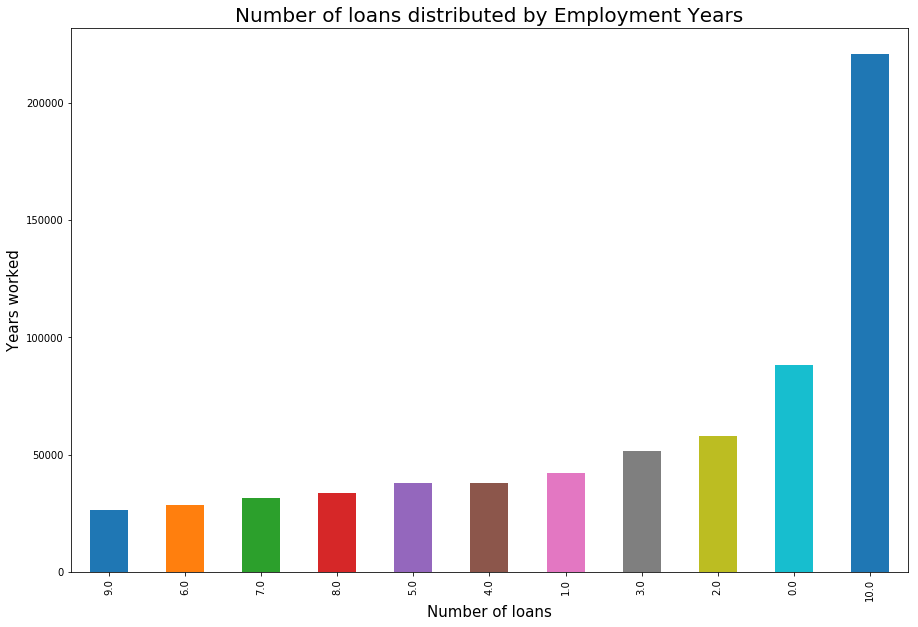

In [32]:
df['emp_length'].value_counts().sort_values().plot(kind='bar',figsize=(15,10))
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);

**It appears that the browser with 10 or higher years of employment got a loan approval more than the others. However, we can see that the ones with less than a year are the second ion ranking. This might be because employment length is not the only factor to make a decision for lending club. Probably those with less than a year were granted a loan because they had other strong factors such as high salary, high credit score, or low requested loan amount and so on.

For all other columns that have missing vaue perncentage of 3 or less than 3% of total values,Since we have enough data to work on I am not going to use any of the imputation technics here. For simlicity I will just drop/delete the rows wehre there is a missing value.

In [33]:
## dropping the null rows since we have sufficient amount of data and there is no need to fill the null values.
df.dropna(axis=0,inplace=True)

In [34]:
df.isnull().values.any()
#no more missing or null values

False

In [35]:
df.shape

(649495, 57)

# Feature Engineering
Feature Engineering goes hand in hand with Data cleaning and preparation. Meaning that we may have already done some Feature Engineering while we were performing Data cleaning and preparation. Here we will deep dive into it and finish our dataset, so it is ready for our Machin learning modeling. First let's pick and prepare our Target column/feature.

**The main goal of these practice is to model an algorithm that can most accurately predict whether if a potential borrower would be able to pay off or will default who will pay off a loan and who will default. The only column that would reflect this would be loan status. So let's look the column loan_status.

In [36]:
df['loan_status'].value_counts()

Fully Paid            511369
Charged Off           119997
Current                17361
Late (31-120 days)       388
In Grace Period          285
Late (16-30 days)         75
Default                   20
Name: loan_status, dtype: int64

**From Lending club website explanation, we can conclude that Fully Paid and Charged Off (We will merge 'Charged off' and 'Default' into one category of default) are our main goals. We won't be using any loan status indicating that the loan is ongoing or in progress, because obviously we can't predict based on something that hasn't reached its final status. So, we will be ignoring those and will be turn Fully Paid and Charged Off into binary of 1 and 0.

In [37]:
df=df[df['loan_status'].isin(['Charged Off', 'Fully Paid', 'Default'])]

In [38]:
mapping={'loan_status':{'Fully Paid': 1, 'Charged Off': 0 , 'Default': 0}}

In [39]:
df=df.replace(mapping)

In [40]:
df['loan_status'].value_counts()

1    511369
0    120017
Name: loan_status, dtype: int64

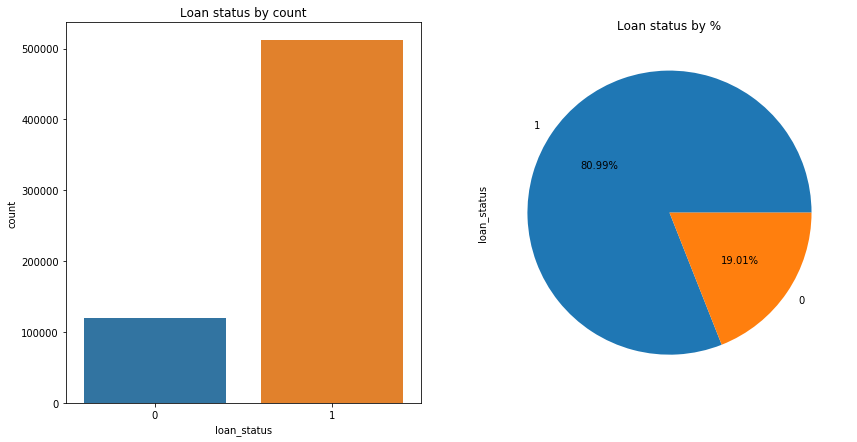

In [41]:
#EDD of loan staus
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.countplot(x='loan_status',data=df,ax=axs[0])
axs[0].set_title("Loan status by count")
df.loan_status.value_counts().plot(kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title("Loan status by %")
plt.show()

**From above we can tell that we are facing a imbalanced dataset. 

In [42]:
resumetable(df).head()
#Just using head() to make it visually easier for you to follow here. Otherwise I wouldn't, so I can see and go through 
#the whole results

Dataset Shape: (631386, 57)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,term,object,0,2,36 months,60 months,36 months,0.88
1,grade,object,0,7,A,C,C,2.35
2,emp_length,float64,0,11,8,10,10,3.06
3,home_ownership,object,0,4,MORTGAGE,RENT,RENT,1.37
4,annual_inc,float64,0,37522,58000,78000,69000,8.19


**Notice that earliest_cr_line and revol_util are 2 columns that need formatting. 

In [43]:
df['revol_util'] = df['revol_util'].str.rstrip('%').astype('float')

In [44]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'],infer_datetime_format=True)

In [45]:
resumetable(df).head()
#Just using head() to make it visually easier for you to follow here. Otherwise I wouldn't, so I can see and go through 
#the whole results

Dataset Shape: (631386, 57)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,term,object,0,2,36 months,60 months,36 months,0.88
1,grade,object,0,7,A,C,C,2.35
2,emp_length,float64,0,11,8,10,10,3.06
3,home_ownership,object,0,4,MORTGAGE,RENT,RENT,1.37
4,annual_inc,float64,0,37522,58000,78000,69000,8.19


**We are almost done. We just need a few more fixes that we will get them done by performing Data Transformation. <a href='https://developers.google.com/machine-learning/data-prep/transform/introduction'> Here</a> is good resource for Data Transformation, why we need to perform it and how? We usually perform Data transformation before training our data for our model. We do that to transform our data to account for any skewness in the variable distribution. <a href='https://towardsdatascience.com/data-preparation-for-machine-learning-cleansing-transformation-feature-engineering-d2334079b06d'> Here</a> is another good short read on Data Transformation.

In [46]:
#for our numerical values we will use boxcox transformation to transform our numerical data into normally distributed data.
from scipy.stats import boxcox
numerical = df.columns[df.dtypes == 'float64']
for i in numerical:
    if df[i].min() > 0:
        transformed, lamb = boxcox(df.loc[df[i].notnull(), i])
        if np.abs(1 - lamb) > 0.02:
            df.loc[df[i].notnull(), i] = transformed

** Now that our numerical data is normalized, we can move on to our categorical data transformation. First the reason why we need to transform our categorical data. The Machine learning Algorithms don't take categorical or string data type as an input. Therefore, we have to create dummy variables for each value. for example, if there is yes/no category we can change them into 1 and 0. There are 2 ways to achieve this here Label Encoding and One Hot Encoding. Label Encoding works best when there are only 2 variable values. for example, yes and no. But if there are more than 2 categories (yes, no, maybe,) then it might cause discrepancies in the algorithm. So, the best option for those would be using One Hot Encoding.

In [47]:
# Label Encoding for the variables with 2 unique values
from sklearn import preprocessing

count = 0

for column in df:
    if df[column].dtype == 'object':
        if len(list(df[column].unique())) <= 2:     
            le = preprocessing.LabelEncoder()
            df[column] = le.fit_transform(df[column])
            count += 1
            print (column)
            
print('%d columns with 2 category that were labled' % count)

term
initial_list_status
2 columns with 2 category that were labled


In [48]:
df.shape
df.head()

,term,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,FICO
0,0,A,8.0,MORTGAGE,6.604542,Not Verified,0,credit_card,14.92,0,...,4,83.3,14.3,0,0,179407,15030,13000,11325,0.083212
1,1,C,10.0,RENT,6.700003,Source Verified,1,debt_consolidation,12.03,0,...,4,100.0,0.0,0,0,196500,149140,10000,12000,0.083212
2,0,C,10.0,RENT,6.660848,Source Verified,1,debt_consolidation,25.81,0,...,3,100.0,60.0,0,0,52490,38566,21100,24890,0.083212
3,1,D,10.0,MORTGAGE,6.846140,Verified,1,car,8.31,1,...,0,76.9,100.0,0,0,368700,18007,4400,18000,0.083212
4,1,D,6.0,RENT,6.635568,Source Verified,1,credit_card,18.49,0,...,2,91.4,100.0,0,0,57073,42315,15000,35573,0.083212


Notice the values in our term column changed to 0 and 1. Now we will take care of the rest of our categorical columns with One Hot Encoding. This create separate columns for each category. It is better to drop the first one, so we have N-1 columns instead of N.

In [49]:
df = pd.get_dummies(df, drop_first=True)
df.shape

(631386, 77)

In [50]:
df.head()

,term,emp_length,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0,8.0,6.604542,0,14.92,0,1989-09-01,2,17,0,...,0,0,0,0,0,0,0,0,0,0
1,1,10.0,6.700003,1,12.03,0,1994-08-01,0,6,0,...,0,0,0,0,0,0,0,0,0,0
2,0,10.0,6.660848,1,25.81,0,1992-11-01,0,12,0,...,0,0,0,0,0,0,0,0,0,0
3,1,10.0,6.846140,1,8.31,1,2000-10-01,0,8,0,...,0,0,0,0,0,0,0,0,0,0
4,1,6.0,6.635568,1,18.49,0,2020-08-20,0,10,0,...,0,0,0,0,0,0,0,0,0,0


**Notice that the number of our columns has increased from 57 to 79. Notice that the purpose columns now is divided into its subcategories example: purpose_home_improvement,purpose_house...

In [51]:
df.to_csv("../cleaned_loands_data.csv",index=False)

**At this point I feel my dataset is ready to be used for building a Machin leaning algorithm. I will Export and save the this cleaned Dataset so I can used it for building a Machin leaning algorithm in another project. Please click here to see and follow along for that project.**